In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [81]:
data = pd.read_csv("songs.csv",parse_dates=["track_album_release_date"])
data.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,Kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,...,kygo,"['bring', 'me', 'higher', 'love,', 'love', '',...",Kygo,bring higher love love bring higher love think...,"['bring', 'higher', 'love', 'love', 'bring', '...",[-0.1148182 0.27755967 0.27891365 0.143460...,[-0.1148182 0.27755967 0.27891365 0.143460...,3,https://i.scdn.co/image/ab67616d0000b2737c8977...,https://open.spotify.com/track/6oJ6le65B3SEqPw...
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),Billieeilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,...,billie eilish,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'...",Billie Eilish,yeah yeah oh ah white shirt red bloody nose sl...,"['yeah', 'yeah', 'oh', 'ah', 'white', 'shirt',...",[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,1,https://i.scdn.co/image/ab67616d0000b273a69b8b...,https://open.spotify.com/track/3yNZ5r3LKfdmjoS...
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),Samfeldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,...,sam feldt,"['one', 'more', 'drink,', 'got', 'one', 'more'...",Sam Feldt,one drink got one bacardi one dance afterparty...,"['one', 'drink', 'got', 'one', 'bacardi', 'one...",[-0.1616459 0.21872164 0.3755187 0.116120...,[-0.1616459 0.21872164 0.37551871 0.116120...,3,https://i.scdn.co/image/ab67616d0000b27354de16...,https://open.spotify.com/track/0qc4QlcCxVTGySh...
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,Elliegoulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,...,ellie goulding,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'...",Ellie Goulding,sixteen sixteen remember moved mum said love s...,"['sixteen', 'sixteen', 'remember', 'moved', 'm...",[-0.17123666 0.15697554 0.2319686 0.190121...,[-0.17123666 0.15697554 0.2319686 0.190121...,3,https://i.scdn.co/image/ab67616d0000b27394181f...,https://open.spotify.com/track/4PkIDTPGedm0enz...
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,Katyperry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,...,katy perry,"[""i'm"", 'losing', 'my', 'self', 'control', '',...",Katy Perry,im losing self control yeah youre starting tri...,"['im', 'losing', 'self', 'control', 'yeah', 'y...",[-0.26988247 0.21529263 0.3686135 0.180054...,[-0.26988247 0.21529263 0.36861351 0.180054...,3,https://i.scdn.co/image/ab67616d0000b2739bea3b...,https://open.spotify.com/track/5PYQUBXc7NYeI1o...


In [149]:
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce', infer_datetime_format=True)

C:\Users\91992\AppData\Local\Temp\ipykernel_10944\1110558538.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce', infer_datetime_format=True)


In [25]:
data["track_artist"].nunique()

468

# Data Filtering and Aggregation:
- List the top 10 most popular songs based on popularity score.
- Find all songs by a specific artist (e.g., "Drake").
- Find the artist with the highest number of songs in the dataset.
- Get the average popularity score of songs released after 2020.
- Find the top 5 artists whose songs have the highest average danceability

In [48]:
data[['track_name', 'artist_name', 'track_popularity']].sort_values(by="track_popularity",ascending=False).head(10)

,track_name,artist_name,track_popularity
429,the box,Roddy Ricch,1.000000
95,memories,Maroon 5,1.000000
96,blinding lights,The Weeknd,1.000000
77,tusa,KAROL G,1.000000
388,falling,Trevor Daniel,0.954545
154,don't start now,Dua Lipa,0.954545
79,everything i wanted,Billie Eilish,0.954545
21,ritmo (bad boys for life),The Black Eyed Peas,0.909091
82,yummy,Justin Bieber,0.863636
52,bad guy,Billie Eilish,0.863636


In [53]:
data[data["artist_name"] == "Drake"]

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
369,369,2G7V7zsVDxg1yRsu7Ew9RJ,in my feelings,Drake,0.318182,2018-06-29,Pop,0.818301,0.611546,0.090909,...,drake,"['trap,', 'trapmoneybenny', '', 'this', 'shit'...",Drake,trap trapmoneybenny shit got feelings got ta r...,"['trap', 'trapmoneybenny', 'shit', 'got', 'fee...",[-0.12342313 0.15873267 0.30500984 0.103762...,[-0.12342313 0.15873267 0.30500984 0.103762...,1,https://i.scdn.co/image/ab67616d0000b273f907de...,https://open.spotify.com/track/2G7V7zsVDxg1yRs...
370,370,6DCZcSspjsKoFjzjrWoCdn,god's plan,Drake,0.454545,2018-06-29,Pop,0.712418,0.421612,0.636364,...,drake,"['yeah,', 'they', ""wishin'"", 'and', ""wishin'"",...",Drake,yeah wishin wishin wishin wishin wishin yuh mo...,"['yeah', 'wishin', 'wishin', 'wishin', 'wishin...",[-1.76206037e-01 7.59527460e-02 3.18630725e-...,[-1.76206037e-01 7.59527460e-02 3.18630725e-...,3,https://i.scdn.co/image/ab67616d0000b273f907de...,https://open.spotify.com/track/6DCZcSspjsKoFjz...
463,463,5r7WvQtyPfy1xch5zMgGRp,behind barz - bonus,Drake,0.045455,2019-09-13,Rap,0.843137,0.534285,0.727273,...,drake,"['yeah', '', 'look', '', 'you', 'know', 'how',...",Drake,yeah look know paigon chitchat goes like rs vs...,"['yeah', 'look', 'know', 'paigon', 'chitchat',...",[-0.16641462 0.06958088 0.24893339 0.166616...,[-1.66414618e-01 6.95808828e-02 2.48933390e-...,3,https://i.scdn.co/image/ab67616d0000b27306d32e...,https://open.spotify.com/track/5r7WvQtyPfy1xch...
468,468,5ry2OE6R2zPQFDO85XkgRb,money in the grave (drake ft. rick ross),Drake,0.545455,2019-06-15,Rap,0.813072,0.478485,0.909091,...,drake,"['yeah,', 'okay', '', ""lil'"", 'cc', 'on', 'the...",Drake,yeah okay lil cc beat mmm yeah yeah mean fuck ...,"['yeah', 'okay', 'lil', 'cc', 'beat', 'mmm', '...",[-1.90755129e-01 -2.13792250e-02 3.19874644e-...,[-1.90755129e-01 -2.13792250e-02 3.19874644e-...,4,https://i.scdn.co/image/ab67616d0000b2733f3b65...,https://open.spotify.com/track/5ry2OE6R2zPQFDO...


In [65]:
data['artist_name'].value_counts().idxmax(), data['artist_name'].value_counts().max()

('Billie Eilish', 19)

In [127]:
songs_after_2019 = data[data["track_album_release_date"].dt.year > 2019]
songs_after_2019["track_popularity"].mean()

0.2636363636363637

In [147]:
data[['track_name','danceability']].sort_values(by="danceability",ascending=False).head(5)

,track_name,danceability
495,bad bad bad (feat. lil baby),1.000000
552,baby (lil baby feat. dababy),0.994771
548,yes indeed,0.986928
551,pure cocaine,0.986928
517,don't rush (feat. headie one),0.983007


# Feature Analysis:
- Find the song with the highest and lowest energy score.
- Get the average tempo of all songs.
- Find the correlation between danceability and energy.
- Find the song(s) with the longest duration.
- Identify the most common key in which the songs are composed.

In [152]:
data.columns

Index(['Unnamed: 0', 'track_id', 'track_name', 'track_artist',
       'track_popularity', 'track_album_release_date', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_artist_merged', 'lyrics', 'artist_name', 'tags',
       'tags_tokenized', 'doc_vector', 'combined_vector', 'cluster',
       'image_url', 'spotify_url'],
      dtype='object')

In [166]:
data[["track_name","track_artist","energy"]].sort_values(by="energy",ascending=False).head(1) # Highest

,track_name,track_artist,energy
285,american idiot,Greenday,1.0


In [168]:
data[["track_name","track_artist","energy"]].sort_values(by="energy",ascending=True).head(1) # Lowest

,track_name,track_artist,energy
846,listen before i go,Billieeilish,0.0


In [174]:
data['tempo'].mean()

0.41470880651982134

In [176]:
data[['danceability', 'energy']].corr()

,danceability,energy
danceability,1.000000,0.031289
energy,0.031289,1.000000


In [178]:
data[["track_name","duration_ms"]].sort_values(by="duration_ms",ascending=False).head(1)

,track_name,duration_ms
147,mirrors,484147


In [180]:
data['key'].mode()[0]

0.0909090909090909

# Advanced Analysis:
- Group the dataset by artists and count the number of songs per artist.
- Find the artist whose songs have the highest average loudness.
- Check if there is a relationship between song duration and popularity.
- Create a histogram of song durations.
- Find the average instrumentalness of songs by year.

In [189]:
data['artist_name'].value_counts()

artist_name
Billie Eilish    19
Ariana Grande    12
Khalid            8
Calvin Harris     8
The Weeknd        7
                 ..
NAV               1
Soulja Boy        1
2Pac              1
T-Pain            1
SHAUN             1
Name: count, Length: 468, dtype: int64

In [197]:
data.groupby('artist_name')['loudness'].mean().idxmax()

'Dj Guuga'

In [201]:
data[['duration_ms', 'track_popularity']].corr()

,duration_ms,track_popularity
duration_ms,1.000000,-0.126763
track_popularity,-0.126763,1.000000


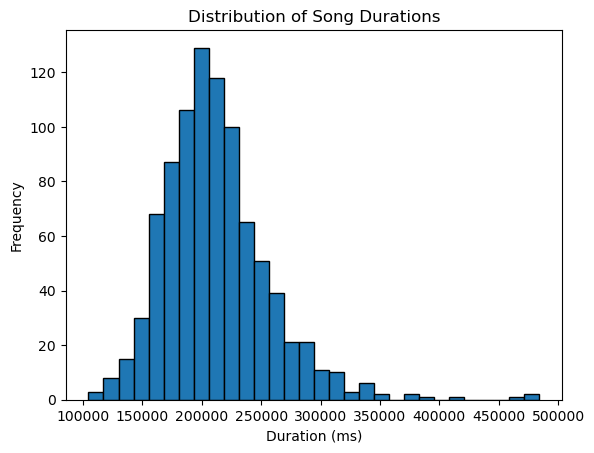

In [203]:
plt.hist(data['duration_ms'], bins=30, edgecolor='black')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()